In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_pickle('dataframe_dropped.pkl')
df.sample(1)

,convex_area,euler_number,extent,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-2,inertia_tensor-2-2,inertia_tensor_eigvals-2,local_centroid-0,max_intensity-0,...,hc_foci_d_nearest_neighbor_mean,hc_foci_d_nearest_neighbor_variance,hc_foci_ratio_nearest_neighbor_volume_mean,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count,full_label,condition
1931,78179.0,0.0,0.507621,-11.98009,6.205151,-28.419689,613.322578,435.433121,6.085225,255.0,...,1.400804,0.69536,23.483155,216.578771,0.583027,0.52127,0.036439,0.032579,JC_Plate2_BSA_84_nucleus_4,BSA


In [36]:
from sklearn.preprocessing import StandardScaler

conditions = df['full_label']

columns = [col for col in df.columns if ('full_label' not in col and 'condition' not in col)]

scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[columns]), columns=columns)

In [37]:
from sklearn.manifold import TSNE

# Create and fit t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_representation = tsne.fit_transform(df_normalized)

# Create DataFrame from t-SNE-transformed data
transformed_data = pd.DataFrame(tsne_representation, columns=['Component 1', 'Component 2'])


In [38]:
transformed_data_labeled = pd.concat([transformed_data.reset_index(drop=True), conditions.reset_index(drop=True)], axis=1, ignore_index=False)
transformed_data_labeled

,Component 1,Component 2,full_label
0,25.349741,-15.080826,JC_Plate2_both_low_98_nucleus_4
1,-21.845800,-19.971416,JC_Plate2_both_low_98_nucleus_7
2,-20.589209,-17.274364,JC_Plate2_both_low_98_nucleus_8
3,-15.818154,20.274227,JC_Plate2_both_low_98_nucleus_10
4,-8.784059,-16.642195,JC_Plate2_both_low_98_nucleus_17
...,...,...,...
2412,-11.819028,1.198822,JC_Plate2_tnfa_low_36_nucleus_1
2413,-11.867100,8.670653,JC_Plate2_tnfa_low_36_nucleus_2
2414,-11.875838,-12.123387,JC_Plate2_tnfa_low_36_nucleus_3
2415,-22.530985,-9.764477,JC_Plate2_tnfa_low_109_nucleus_1


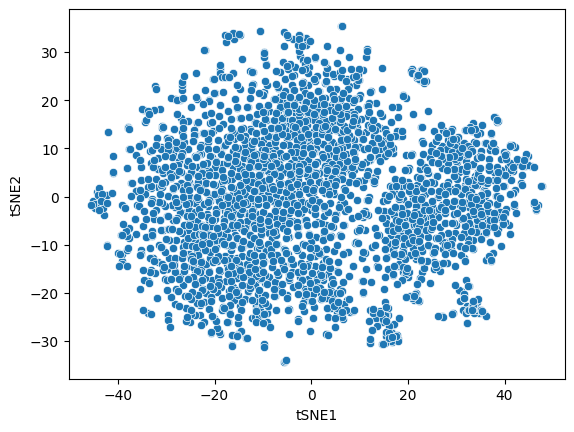

In [43]:
sns.scatterplot(data = transformed_data_labeled, x = 'Component 1', y = 'Component 2')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.show()

In [32]:
df_cluster_trans = transformed_data_labeled[transformed_data_labeled['Component 1'] > 20]
df_cluster_trans.describe()

,Component 1,Component 2
count,524.000000,524.000000
mean,30.902920,-1.057756
std,6.723565,11.052446
min,20.002954,-26.221258
25%,24.972840,-8.103528
50%,31.044485,-0.525866
75%,35.883964,7.012361
max,47.744114,26.370338


In [33]:
labels = set(df_cluster_trans.full_label)
labels

{'JC_Plate2_BSA_0_nucleus_4',
 'JC_Plate2_BSA_0_nucleus_5',
 'JC_Plate2_BSA_0_nucleus_6',
 'JC_Plate2_BSA_0_nucleus_7',
 'JC_Plate2_BSA_100_nucleus_2',
 'JC_Plate2_BSA_102_nucleus_3',
 'JC_Plate2_BSA_104_nucleus_2',
 'JC_Plate2_BSA_113_nucleus_2',
 'JC_Plate2_BSA_114_nucleus_3',
 'JC_Plate2_BSA_115_nucleus_1',
 'JC_Plate2_BSA_117_nucleus_3',
 'JC_Plate2_BSA_120_nucleus_2',
 'JC_Plate2_BSA_122_nucleus_1',
 'JC_Plate2_BSA_124_nucleus_1',
 'JC_Plate2_BSA_124_nucleus_2',
 'JC_Plate2_BSA_124_nucleus_3',
 'JC_Plate2_BSA_128_nucleus_1',
 'JC_Plate2_BSA_128_nucleus_3',
 'JC_Plate2_BSA_129_nucleus_1',
 'JC_Plate2_BSA_129_nucleus_3',
 'JC_Plate2_BSA_12_nucleus_1',
 'JC_Plate2_BSA_130_nucleus_1',
 'JC_Plate2_BSA_133_nucleus_1',
 'JC_Plate2_BSA_137_nucleus_1',
 'JC_Plate2_BSA_138_nucleus_1',
 'JC_Plate2_BSA_139_nucleus_2',
 'JC_Plate2_BSA_13_nucleus_2',
 'JC_Plate2_BSA_141_nucleus_3',
 'JC_Plate2_BSA_142_nucleus_3',
 'JC_Plate2_BSA_16_nucleus_6',
 'JC_Plate2_BSA_1_nucleus_13',
 'JC_Plate2_BSA_1_nu

In [34]:
df_cluster = df[df['full_label'].isin(labels)]
df_cluster.to_pickle('df_cluster.pkl')

{'JC_Plate1_Control_100_nucleus_2',
 'JC_Plate1_Control_101_nucleus_1',
 'JC_Plate1_Control_106_nucleus_2',
 'JC_Plate1_Control_107_nucleus_1',
 'JC_Plate1_Control_108_nucleus_2',
 'JC_Plate1_Control_109_nucleus_1',
 'JC_Plate1_Control_110_nucleus_1',
 'JC_Plate1_Control_1_nucleus_2',
 'JC_Plate1_Control_27_nucleus_2',
 'JC_Plate1_Control_33_nucleus_1',
 'JC_Plate1_Control_38_nucleus_2',
 'JC_Plate1_Control_39_nucleus_3',
 'JC_Plate1_Control_40_nucleus_2',
 'JC_Plate1_Control_42_nucleus_1',
 'JC_Plate1_Control_42_nucleus_2',
 'JC_Plate1_Control_42_nucleus_3',
 'JC_Plate1_Control_44_nucleus_2',
 'JC_Plate1_Control_46_nucleus_1',
 'JC_Plate1_Control_47_nucleus_1',
 'JC_Plate1_Control_52_nucleus_2',
 'JC_Plate1_Control_52_nucleus_3',
 'JC_Plate1_Control_52_nucleus_4',
 'JC_Plate1_Control_53_nucleus_2',
 'JC_Plate1_Control_54_nucleus_2',
 'JC_Plate1_Control_55_nucleus_2',
 'JC_Plate1_Control_56_nucleus_1',
 'JC_Plate1_Control_56_nucleus_2',
 'JC_Plate1_Control_58_nucleus_1',
 'JC_Plate1_Co

In [35]:
df_images = pd.read_pickle('dataframe_images.pkl')
df_images.reset_index(drop=False, inplace=True)
df_cluster_img = df_images[df_images['full_label'].isin(labels)]
df_cluster_img.to_pickle('df_cluster_img.pkl')


In [6]:
#del df_images

Text(0.5, 1.0, 'Class sizes in subcluster of global tSNE')

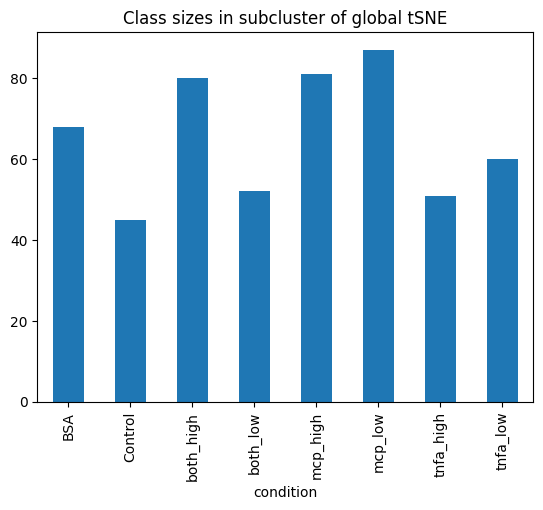

In [10]:
df_sub = pd.read_pickle('df_cluster.pkl')
df_sub.groupby(['condition'])['condition'].count().plot(kind='bar')
plt.title('Class sizes in subcluster of global tSNE')

<h4>Having a look at features of subcluster</h4>

In [10]:
import pandas as pd

In [3]:
df_sub = pd.read_pickle('df_cluster.pkl')
labels = set(df_sub.full_label)

In [4]:
df = pd.read_pickle('dataframe_dropped.pkl')
df = df.drop(columns='condition')


In [5]:
df['condition'] = df['full_label'].apply(lambda x: 'cluster' if x in labels else 'main')


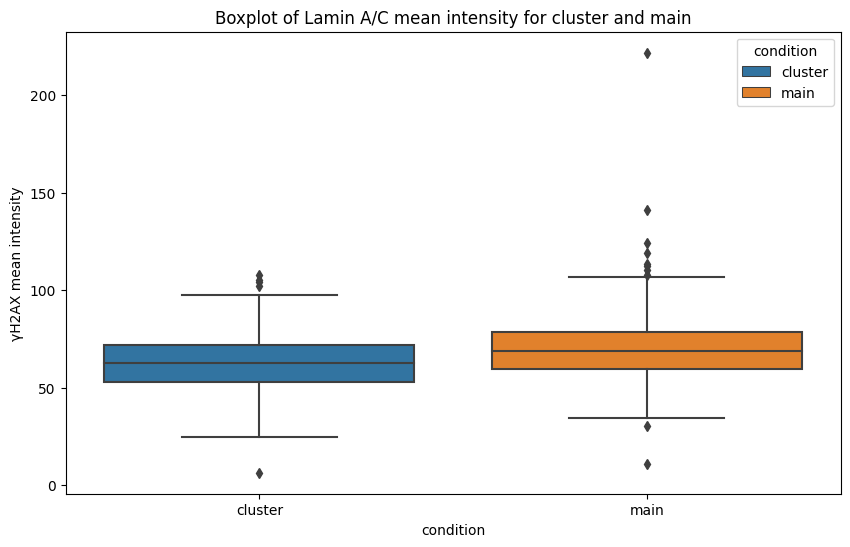

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='condition', y='mean_intensity-2', hue='condition', dodge=False)
plt.title('Boxplot of Lamin A/C mean intensity for cluster and main')
plt.ylabel('γH2AX mean intensity')
plt.show()

In [12]:
for col in df.columns:
    print(col)

convex_area
euler_number
extent
inertia_tensor-0-1
inertia_tensor-0-2
inertia_tensor-1-2
inertia_tensor-2-2
inertia_tensor_eigvals-2
local_centroid-0
max_intensity-0
max_intensity-1
max_intensity-2
mean_intensity-0
mean_intensity-1
mean_intensity-2
min_intensity-0
min_intensity-1
min_intensity-2
moments_central-0-0-1
moments_central-0-0-3
moments_central-0-1-0
moments_central-0-1-2
moments_central-0-2-1
moments_central-0-2-3
moments_central-0-3-0
moments_central-0-3-2
moments_central-1-0-0
moments_central-1-0-2
moments_central-1-1-1
moments_central-1-2-0
moments_central-1-2-2
moments_central-2-0-1
moments_central-2-0-3
moments_central-2-1-0
moments_central-2-1-2
moments_central-2-2-1
moments_central-2-3-0
moments_central-3-0-0
moments_normalized-0-2-2
moments_normalized-2-0-0
moments_normalized-2-0-2
moments_normalized-2-2-0
solidity
weighted_moments-0-0-0-2
weighted_moments_central-0-0-1-0
weighted_moments_central-0-0-1-1
weighted_moments_central-0-0-1-2
weighted_moments_central-0-0-3